# Customer Churn Prediction

## Objective

The objective is to develop a machine learning model to predict customer churn based on historical customer data. You 
will follow a typical machine learning project pipeline, from data preprocessing to model deployment

### Data Preprocessing

In [30]:
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [31]:
df  = pd.read_csv("customer_churn_large_dataset.csv")
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [32]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [33]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [34]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

It seems there are no missing data in the dataset

In [35]:
# Handling outliers
z_sub = stats.zscore(df['Subscription_Length_Months'])
df = df[(z_sub < 3) & (z_sub > -3)]

z_bill = stats.zscore(df['Monthly_Bill'])
df = df[(z_bill < 3) & (z_bill > -3)]

z_usage = stats.zscore(df['Total_Usage_GB'])
df = df[(z_usage < 3) & (z_usage > -3)]

z_churn = stats.zscore(df['Churn'])
df = df[(z_churn < 3) & (z_churn > -3)]


In [36]:
df = pd.get_dummies(df, columns=['Gender', 'Location'], drop_first=True)

In [37]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Engineering

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV


In [40]:
data = pd.read_csv("customer_churn_large_dataset.csv")

In [41]:
# Handle missing data (if needed)
data.dropna(inplace=True)

# Encode categorical variables (One-Hot Encoding)
encoder = OneHotEncoder(sparse=False, drop='first')
categorical_cols = ['Gender', 'Location']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
data_encoded['CustomerID'] = data_encoded['CustomerID'].astype('int64')
data_encoded = data_encoded.drop(['CustomerID', 'Name'], axis=1)


In [42]:
data.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [43]:
data_encoded.dtypes

Age                             int64
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
Gender_Male                      bool
Location_Houston                 bool
Location_Los Angeles             bool
Location_Miami                   bool
Location_New York                bool
dtype: object

In [44]:
X = data_encoded.drop("Churn", axis=1)
y = data_encoded["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## RandomForestClassifier

In [42]:
# Model Building
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [21]:
rf_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


In [ ]:
rs_model = RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=10,
                              verbose=True)
rs_model.fit(X_train_scaled, y_train)

In [ ]:
best_params = rs_model.best_params_
best_model = rs_model.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test_scaled)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:

# Display performance metrics
print("Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Model Evaluation Metrics:
Accuracy: 0.49555
Precision: 0.4912023460410557
Recall: 0.4727346033665961
F1 Score: 0.4817915660794083


## XGBOOST

In [17]:
import xgboost as xgb

# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train_scaled, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test_scaled, y_test, enable_categorical=True)

/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


In [20]:
import matplotlib.pyplot as plt
# XGBoost (different learning rate)
learning_rate_range = np.arange(0.01, 1, 0.05)
test_XG = [] 
train_XG = []
for lr in learning_rate_range:
    xgb_classifier = xgb.XGBClassifier(eta = lr)
    xgb_classifier.fit(X_train_scaled, y_train)
    train_XG.append(xgb_classifier.score(X_train_scaled, y_train))
    test_XG.append(xgb_classifier.score(X_test_scaled, y_test))
    

/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/codespace/.python/current/lib/python3.10/site-packages

In [23]:
test_XG

[0.50085,
 0.5013,
 0.5023,
 0.49995,
 0.50545,
 0.4964,
 0.5019,
 0.49925,
 0.49965,
 0.5058,
 0.49715,
 0.50255,
 0.50035,
 0.49415,
 0.49955,
 0.501,
 0.49385,
 0.4962,
 0.4958,
 0.49705]

In [25]:
train_XG

[0.553625,
 0.59885,
 0.622625,
 0.6378125,
 0.6445375,
 0.659,
 0.66585,
 0.6698875,
 0.6753125,
 0.6776,
 0.6785375,
 0.6808375,
 0.6800375,
 0.685825,
 0.6868875,
 0.690825,
 0.687325,
 0.691775,
 0.691725,
 0.692975]

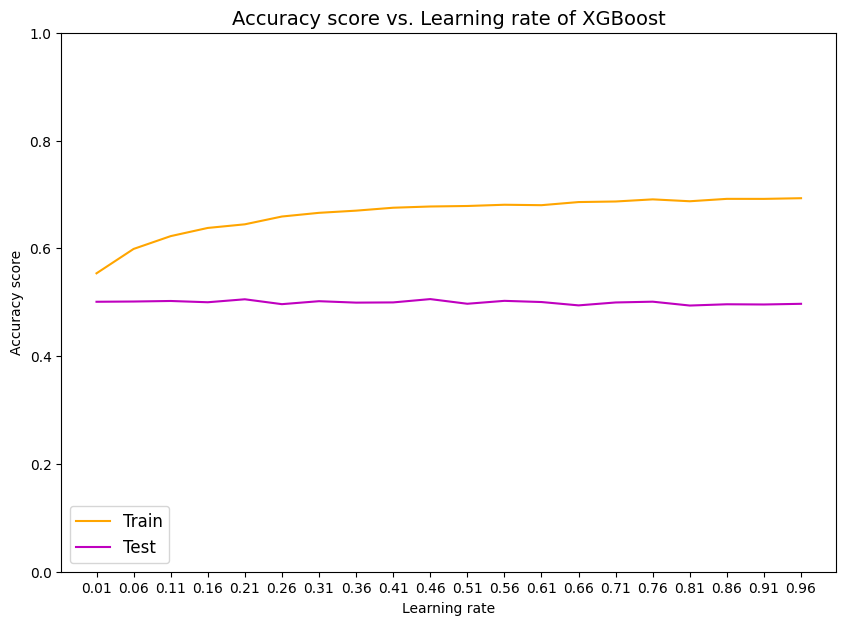

In [26]:
fig = plt.figure(figsize=(10, 7))
plt.plot(learning_rate_range, train_XG, c='orange', label='Train')
plt.plot(learning_rate_range, test_XG, c='m', label='Test')
plt.xlabel('Learning rate')
plt.xticks(learning_rate_range)
plt.ylabel('Accuracy score')
plt.ylim(0.0, 1)
plt.legend(prop={'size': 12}, loc=3)
plt.title('Accuracy score vs. Learning rate of XGBoost', size=14)
plt.show()

/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

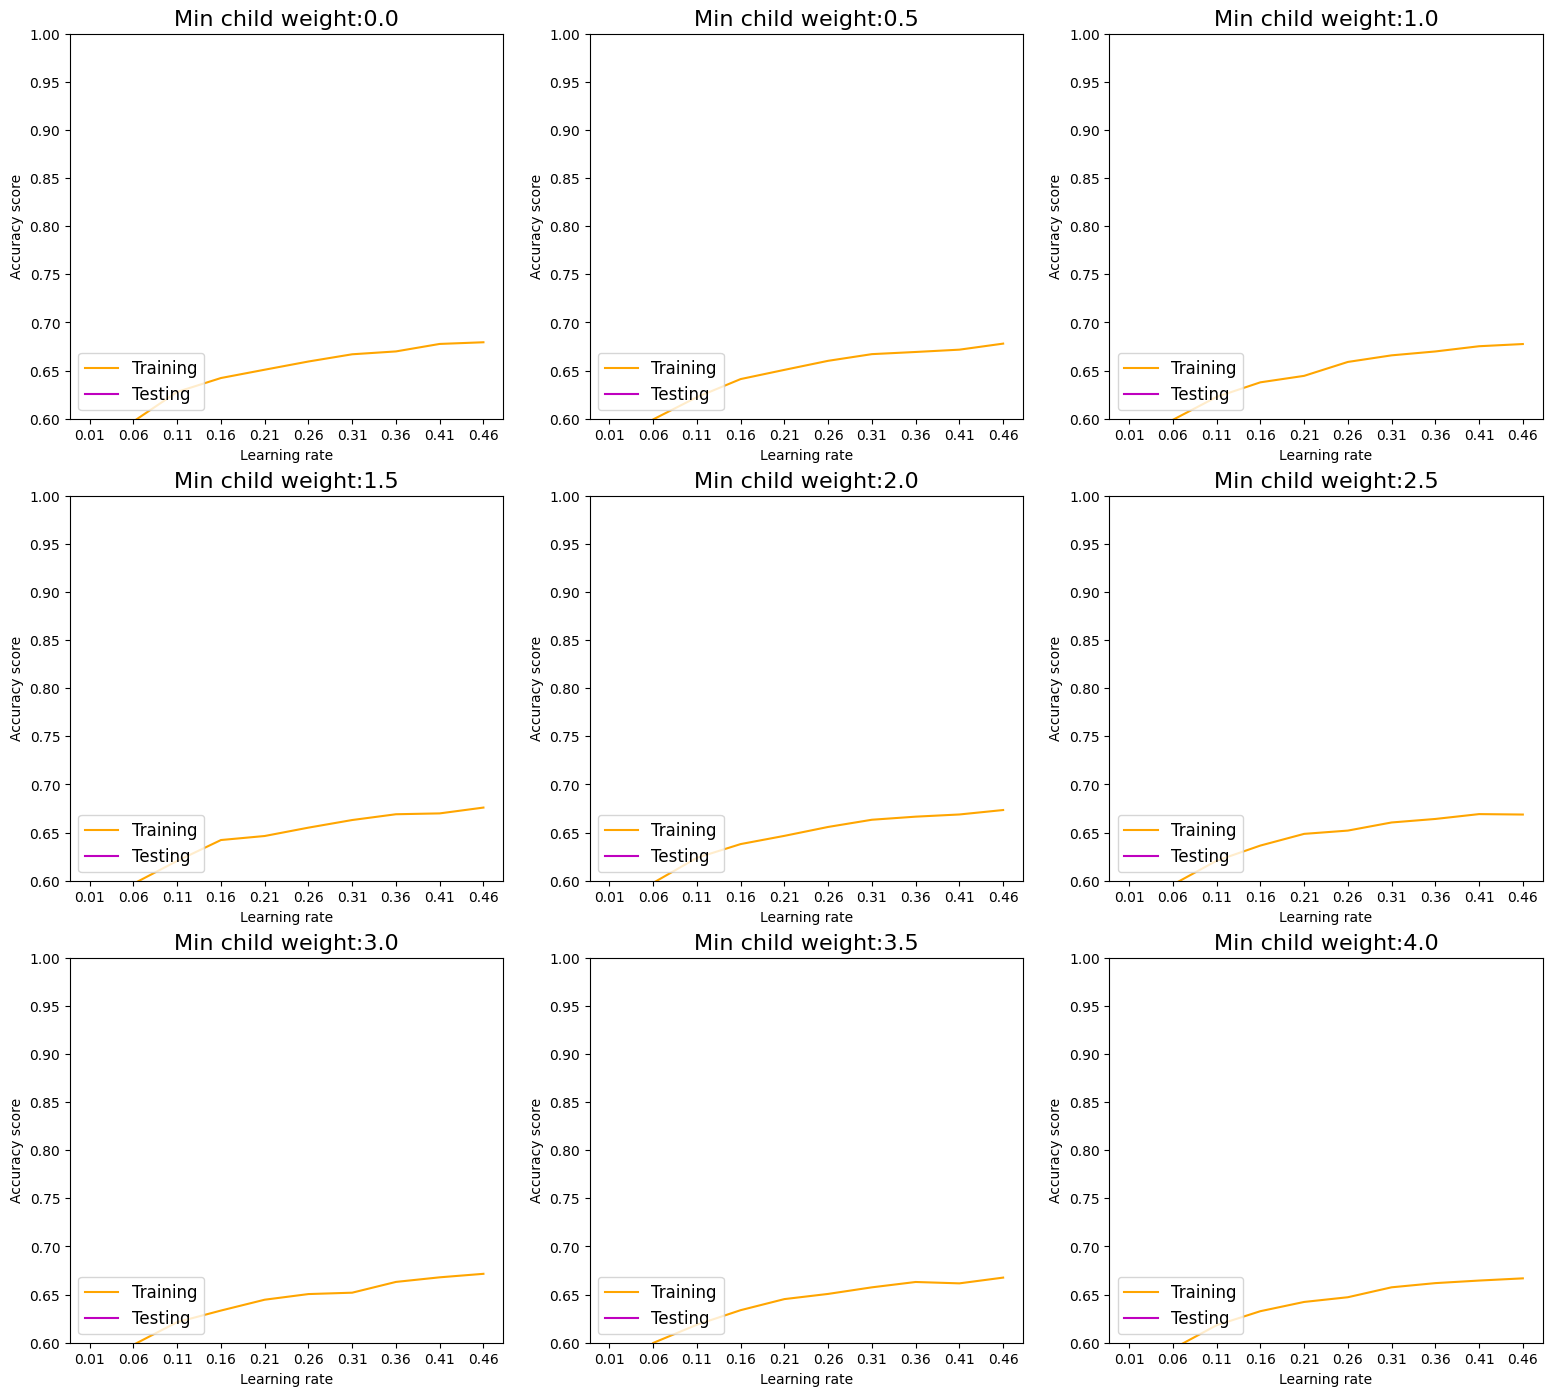

In [34]:
# new learning rate range
learning_rate_range = np.arange(0.01, 0.5, 0.05)
fig = plt.figure(figsize=(19, 17))
idx = 1
# grid search for min_child_weight
for weight in np.arange(0, 4.5, 0.5):
    train = []
    test = []
    for lr in learning_rate_range:
        xgb_classifier = xgb.XGBClassifier(eta = lr, reg_lambda=1, min_child_weight=weight)
        xgb_classifier.fit(X_train, y_train)
        train.append(xgb_classifier.score(X_train, y_train))
        test.append(xgb_classifier.score(X_test, y_test))
    fig.add_subplot(3, 3, idx)
    idx += 1
    plt.plot(learning_rate_range, train, c='orange', label='Training')
    plt.plot(learning_rate_range, test, c='m', label='Testing')
    plt.xlabel('Learning rate')
    plt.xticks(learning_rate_range)
    plt.ylabel('Accuracy score')
    plt.ylim(0.6, 1)
    plt.legend(prop={'size': 12}, loc=3)
    title = "Min child weight:" + str(weight)
    plt.title(title, size=16)
plt.show()

In [48]:
test_XG

[0.50085,
 0.5013,
 0.5023,
 0.49995,
 0.50545,
 0.4964,
 0.5019,
 0.49925,
 0.49965,
 0.5058,
 0.49715,
 0.50255,
 0.50035,
 0.49415,
 0.49955,
 0.501,
 0.49385,
 0.4962,
 0.4958,
 0.49705]

## DeepForestClassifier

ERROR: Could not find a version that satisfies the requirement deep-forest (from versions: none)
ERROR: No matching distribution found for deep-forest


In [59]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
import deepforest

In [61]:
# Here is the estimator used for the RusBoost classifier
rusBoost_estimator = RandomForestClassifier(
                            random_state=42,
                            class_weight="balanced_subsample",
                            n_jobs=-1
                     )
                     
# Here is the estimator used for the Deep Forest classifier       
deepForest_estimator = RUSBoostClassifier(
                            random_state=42,
                            base_estimator=rusBoost_estimator
                       )

# Here is the estimator used for diversity for the Deep Forest classifier       
deepForest_estimator_for_diversity = ExtraTreesClassifier(
                                        n_estimators=100,
                                        random_state=42,
                                     )

In [63]:
model = deepforest.CascadeForestClassifier(random_state=42)

# Build N `deepForest_estimator` using a list:
# (Once again, N must be chosen by you; it is an arbitrary number here)
N=2
main_estimators = [deepForest_estimator for _ in range(N)]

# Build N `deepForest_estimator_for_diversity` using a list:
# (Once again, N must be chosen by you; it is an arbitrary number here)
N=2
diverse_estimators = [deepForest_estimator_for_diversity for _ in range(N)]

# Now that your estimators are ready to be applied to the
# previously instantiated deep forest model, here we go:
estimators = main_estimators + diverse_estimators
model.set_estimator(estimators)

AttributeError: module 'deepforest' has no attribute 'CascadeForestClassifier'

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.50


## Neural Network Approach

In [19]:
import tensorflow as tf
from tensorflow import keras

2023-09-17 10:37:50.471223: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-17 10:37:50.497794: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-17 10:37:50.498662: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-17 10:37:51.764363: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [19]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/10
2500/2500 [==============================] - 4s 1ms/step - loss: 0.6953 - accuracy: 0.5017 - val_loss: 0.6935 - val_accuracy: 0.4958
Epoch 2/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6934 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.5021
Epoch 3/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6933 - accuracy: 0.5011 - val_loss: 0.6933 - val_accuracy: 0.5044
Epoch 4/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6932 - accuracy: 0.5036 - val_loss: 0.6932 - val_accuracy: 0.5009
Epoch 5/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6933 - accuracy: 0.5016 - val_loss: 0.6931 - val_accuracy: 0.5023
Epoch 6/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6933 - accuracy: 0.5023 - val_loss: 0.6932 - val_accuracy: 0.5017
Epoch 7/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6932 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test accuracy:", accuracy)
print("Test loss:", loss)

625/625 [==============================] - 1s 921us/step - loss: 0.6931 - accuracy: 0.5055
Test accuracy: 0.5055000185966492


## CNN Approach

In [20]:
# Define the CNN model
model_cnn = keras.Sequential([
    keras.layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
# Compile the model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [22]:
# Train the model
model_cnn.fit(X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1), y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1), y_test))

Epoch 1/10
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6942 - accuracy: 0.4977 - val_loss: 0.6931 - val_accuracy: 0.5031
Epoch 2/10
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6933 - accuracy: 0.4994 - val_loss: 0.6932 - val_accuracy: 0.4978
Epoch 3/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6932 - accuracy: 0.5034 - val_loss: 0.6931 - val_accuracy: 0.5053
Epoch 4/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5059
Epoch 5/10
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.5019 - val_loss: 0.6931 - val_accuracy: 0.5051
Epoch 6/10
2500/2500 [==============================] - 4s 1ms/step - loss: 0.6932 - accuracy: 0.5008 - val_loss: 0.6931 - val_accuracy: 0.5043
Epoch 7/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6932 - accuracy: 0.5040 - val_loss: 0.6929 - val_accuracy:

In [26]:
test_loss, test_accuracy = model_cnn.evaluate(X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1), y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

 53/625 [=>............................] - ETA: 0s - loss: 0.6935 - accuracy: 0.4900

625/625 [==============================] - 1s 1ms/step - loss: 0.6930 - accuracy: 0.5045
Test Loss: 0.6930498480796814
Test Accuracy: 0.5045499801635742


In [27]:
# Predictions on the test set
y_pred = model_cnn.predict(X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1))
y_pred_binary = (y_pred > 0.5).astype(int)

625/625 [==============================] - 1s 1ms/step


In [28]:
# Evaluate precision, recall, F1-score, and confusion matrix
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
confusion = confusion_matrix(y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

Precision: 0.5038119440914867
Recall: 0.07993145852232637
F1 Score: 0.13797303175293604
Confusion Matrix:
[[9298  781]
 [9128  793]]


## LSTM Model

In [29]:
# Define the LSTM model
model_lstm = keras.Sequential([
    keras.layers.LSTM(64, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

In [30]:
# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
# Train the model
model_lstm.fit(X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1), y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1), y_test))

Epoch 1/10
2500/2500 [==============================] - 10s 3ms/step - loss: 0.6933 - accuracy: 0.5035 - val_loss: 0.6931 - val_accuracy: 0.5039
Epoch 2/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6932 - accuracy: 0.5007 - val_loss: 0.6931 - val_accuracy: 0.5039
Epoch 3/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.5030
Epoch 4/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6932 - accuracy: 0.5018 - val_loss: 0.6933 - val_accuracy: 0.4961
Epoch 5/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6931 - accuracy: 0.5033 - val_loss: 0.6933 - val_accuracy: 0.5039
Epoch 6/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6931 - val_accuracy: 0.5039
Epoch 7/10
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6931 - val_accuracy

In [32]:
# Evaluate the LSTM model on the test set
test_loss, test_accuracy = model_lstm.evaluate(X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1), y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

625/625 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5039
Test Loss: 0.6931634545326233
Test Accuracy: 0.5039499998092651


In [33]:
# Predictions on the test set
y_pred = model_lstm.predict(X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1))
y_pred_binary = (y_pred > 0.5).astype(int)

625/625 [==============================] - 2s 2ms/step


In [34]:
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
confusion = confusion_matrix(y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[10079     0]
 [ 9921     0]]


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Wide and Deep Learning

In [35]:
# Define the wide and deep model
input_layer = keras.layers.Input(shape=(X_train_scaled.shape[1],))
wide_branch = keras.layers.Dense(32, activation='relu')(input_layer)
deep_branch = keras.layers.Dense(64, activation='relu')(input_layer)
deep_branch = keras.layers.Dropout(0.3)(deep_branch)
deep_branch = keras.layers.Dense(32, activation='relu')(deep_branch)
deep_branch = keras.layers.Dropout(0.3)(deep_branch)
combined = keras.layers.concatenate([wide_branch, deep_branch])
output_layer = keras.layers.Dense(1, activation='sigmoid')(combined)

model_wide_deep = keras.models.Model(inputs=input_layer, outputs=output_layer)


In [36]:
# Compile the model
model_wide_deep.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [37]:
# Train the model
model_wide_deep.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/10
2500/2500 [==============================] - 4s 1ms/step - loss: 0.6973 - accuracy: 0.5027 - val_loss: 0.6937 - val_accuracy: 0.5002
Epoch 2/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6938 - accuracy: 0.5058 - val_loss: 0.6938 - val_accuracy: 0.5008
Epoch 3/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6934 - accuracy: 0.5057 - val_loss: 0.6943 - val_accuracy: 0.4974
Epoch 4/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6934 - accuracy: 0.5043 - val_loss: 0.6933 - val_accuracy: 0.5033
Epoch 5/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6934 - accuracy: 0.5060 - val_loss: 0.6937 - val_accuracy: 0.5037
Epoch 6/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6933 - accuracy: 0.5052 - val_loss: 0.6934 - val_accuracy: 0.5021
Epoch 7/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6932 - accuracy: 0.5074 - val_loss: 0.6934 - val_accuracy:

In [38]:
# Evaluate the Wide & Deep Learning model on the test set
test_loss, test_accuracy = model_wide_deep.evaluate(X_test_scaled, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

625/625 [==============================] - 1s 983us/step - loss: 0.6934 - accuracy: 0.5023
Test Loss: 0.6934338808059692
Test Accuracy: 0.5022500157356262


In [39]:
# Predictions on the test set
y_pred = model_wide_deep.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate precision, recall, F1-score, and confusion matrix
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
confusion = confusion_matrix(y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

625/625 [==============================] - 1s 805us/step
Precision: 0.4970730027548209
Recall: 0.29099889124080236
F1 Score: 0.36709263144510146
Confusion Matrix:
[[7158 2921]
 [7034 2887]]


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

## MLP

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


2023-09-17 16:04:59.952123: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-17 16:05:03.630599: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-17 16:05:03.631874: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-17 16:05:08.546593: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [74]:
# Create a Sequential model
model = Sequential()

# Add an input layer (adjust input_dim to match the number of features)
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add one or more hidden layers with relu activation
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Add the output layer with the appropriate activation function for your task
# For binary classification, use 'sigmoid'; for multi-class classification, use 'softmax'
model.add(Dense(units=1, activation='sigmoid'))


In [75]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [76]:
df = pd.read_csv("customer_churn_large_dataset.csv")
df = df.drop(['CustomerID', 'Name'], axis=1)

# Handle missing data (if needed)
df.dropna(inplace=True)

# Encode categorical variables (One-Hot Encoding)
encoder = OneHotEncoder(sparse=False, drop='first')
categorical_cols = ['Gender', 'Location']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Target variable
y = y.astype('float32')


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


2500/2500 [==============================] - 4s 1ms/step - loss: 0.2818 - accuracy: 0.8002
Epoch 2/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.2752 - accuracy: 0.8023
Epoch 3/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.2752 - accuracy: 0.8030
Epoch 4/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.2751 - accuracy: 0.8042
Epoch 5/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.2751 - accuracy: 0.8034
Epoch 6/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.2751 - accuracy: 0.8034
Epoch 7/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.2751 - accuracy: 0.8033
Epoch 8/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.2751 - accuracy: 0.8043
Epoch 9/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.2751 - accuracy: 0.8048
Epoch 10/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.2751 - accurac

In [80]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

625/625 [==============================] - 1s 841us/step - loss: 0.2782 - accuracy: 0.7964
Test Loss: 0.2782440781593323, Test Accuracy: 0.7964000105857849


## Data Proprocessing

In [3]:
df = pd.read_csv("customer_churn_large_dataset.csv")
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [6]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [7]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [10]:
df_copy = df.drop(['CustomerID', 'Name'], axis=1)
df_copy.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [15]:
df_copy.dtypes

Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [16]:
# Encode categorical variables (One-Hot Encoding)
encoder = OneHotEncoder(sparse=False, drop='first')
categorical_cols = ['Gender', 'Location']
df_encoded = pd.get_dummies(df_copy, columns=categorical_cols, drop_first=True)

In [17]:
df_encoded.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,True,False,True,False,False
1,62,1,48.76,172,0,False,False,False,False,True
2,24,5,85.47,460,0,False,False,True,False,False
3,36,3,97.94,297,1,False,False,False,True,False
4,46,19,58.14,266,0,False,False,False,True,False


In [18]:
X = df.drop('Churn', axis=1)
y = df['Churn']

### Feature Scaling

#### MinMaxScalar